Total User IDs missing in dataset 2: 487375
Sample of missing User IDs in dataset 2: ['U313968', 'U404140', 'U211572', 'U669330', 'U709806', 'U80848', 'U393017', 'U487832', 'U571205', 'U285496']
Total User IDs missing in dataset 1: 37983
Sample of missing User IDs in dataset 1: ['U735686', 'U742870', 'U739337', 'U714195', 'U739825', 'U742943', 'U722652', 'U717308', 'U731945', 'U730899']
Overlap percentage between datasets: 28.65%
Missing user IDs in dataset 2 saved to 'missing_in_dataset_2.csv'
Missing user IDs in dataset 1 saved to 'missing_in_dataset_1.csv'
Top 5 prefixes in missing User IDs in dataset 2: [('U1', 76507), ('U4', 76360), ('U6', 76046), ('U2', 76043), ('U3', 76021)]
Top 5 prefixes in missing User IDs in dataset 1: [('U7', 37983)]


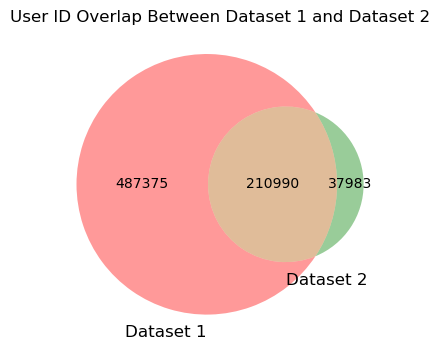

In [1]:
import pandas as pd
from collections import Counter
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Load the datasets
dataset_1 = pd.read_csv('/Users/n7/Desktop/ie University SAMBD Acadamics/Capstone Project/Data/MINDlarge_train/Cleaned Datasets/cleaned_behavior_dataset.csv')
dataset_2 = pd.read_csv('/Users/n7/Desktop/ie University SAMBD Acadamics/Capstone Project/Data/MINDlarge_dev/Cleaned Dataset/cleaned_behavior_dataset.csv')

# Normalize column names to lowercase with underscores for consistency
dataset_1.columns = dataset_1.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)
dataset_2.columns = dataset_2.columns.str.strip().str.lower().str.replace(' ', '_', regex=False)

# Ensure the 'user_id' column exists after normalization
if 'user_id' not in dataset_1.columns or 'user_id' not in dataset_2.columns:
    raise ValueError("One or both datasets are missing the 'user_id' column.")

# Get unique user IDs from both datasets
user_ids_1 = set(dataset_1['user_id'].unique())
user_ids_2 = set(dataset_2['user_id'].unique())

# Find missing user IDs in both directions
missing_in_dataset_2 = user_ids_1 - user_ids_2
missing_in_dataset_1 = user_ids_2 - user_ids_1

# Calculate the overlap percentage
common_user_ids = user_ids_1.intersection(user_ids_2)
overlap_percentage = (len(common_user_ids) / len(user_ids_1.union(user_ids_2))) * 100

# Display summary information
print(f"Total User IDs missing in dataset 2: {len(missing_in_dataset_2)}")
print(f"Sample of missing User IDs in dataset 2: {list(missing_in_dataset_2)[:10]}")

print(f"Total User IDs missing in dataset 1: {len(missing_in_dataset_1)}")
print(f"Sample of missing User IDs in dataset 1: {list(missing_in_dataset_1)[:10]}")

print(f"Overlap percentage between datasets: {overlap_percentage:.2f}%")

# Save missing user IDs to CSV files
if missing_in_dataset_2:
    pd.DataFrame(missing_in_dataset_2, columns=['user_id']).to_csv('missing_in_dataset_2.csv', index=False)
    print("Missing user IDs in dataset 2 saved to 'missing_in_dataset_2.csv'")

if missing_in_dataset_1:
    pd.DataFrame(missing_in_dataset_1, columns=['user_id']).to_csv('missing_in_dataset_1.csv', index=False)
    print("Missing user IDs in dataset 1 saved to 'missing_in_dataset_1.csv'")

# Analyze prefixes of missing user IDs
prefixes_in_missing_2 = [uid[:2] for uid in missing_in_dataset_2]
prefixes_in_missing_1 = [uid[:2] for uid in missing_in_dataset_1]

print("Top 5 prefixes in missing User IDs in dataset 2:", Counter(prefixes_in_missing_2).most_common(5))
print("Top 5 prefixes in missing User IDs in dataset 1:", Counter(prefixes_in_missing_1).most_common(5))

# Visualize overlap using a Venn diagram
plt.figure(figsize=(8, 4))
venn2([user_ids_1, user_ids_2], ('Dataset 1', 'Dataset 2'))
plt.title("User ID Overlap Between Dataset 1 and Dataset 2")
plt.show()
